<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the data

Load the csv file and print the first five observations.

In [8]:
df=pd.read_csv('fish_weight_predict.csv')
x=df['Species'].value_counts()
df['Species']=df['Species'].map(x)

Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
x = df.drop(columns = "Weight")
y = df["Weight"]

from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()
# dir(linear_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     200.3
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.60e-69
Time:                        15:03:29   Log-Likelihood:                -985.89
No. Observations:                 159   AIC:                             1986.
Df Residuals:                     152   BIC:                             2007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -465.7652     35.204    -13.231      0.000    -535.317    -396.213
Species       -1.1865      0.747     -1.589      0.114      -2.662       0.289
V_length      41.6909     42.215      0.988      0.325     -41.713     125.095
D_length      24.9138     46.569      0.535      0.593     -67.092     116.919
C_length     -41.7214     19.199     -2.173      0.031     -79.653      -3.790
Height        30.3887      8.782      3.460      0.001      13.038      47.740
Width         30.1893     20.620      1.464      0.145     -10.549      70.928
==============================================================================
Omnibus:                       22.058   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.460
Skew:                           0.792   Prob(JB):                     2.43e-07
Kurtosis:                       4.445   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc=sc.fit_transform(df)
df_sc=pd.DataFrame(df_sc,columns=df.columns)

x = df_sc.drop(columns = "Weight")
y = df_sc["Weight"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)
from sklearn.linear_model import LinearRegression
lr=  LinearRegression()
sfs = lr.fit(x,y)
lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_pred_train,y_train)
mse_test = mean_squared_error(y_pred_test,y_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
rmse_train,rmse_test
# No over fiting

(0.3400913317462113, 0.34269843193253396)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[ vif(xc.values,i) for i in range(xc.shape[1]) ]
pd.DataFrame(vf,index=xc.columns,columns=['vif'])
# except species all otheres have high muticollinearity


,vif
const,1.000000
Species,1.951919
V_length,1890.038016
D_length,2643.174016
C_length,527.338264
Height,15.038449
Width,12.824278


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
from sklearn import metrics 
from sklearn.linear_model import Ridge,Lasso,ElasticNet
rid= Ridge(alpha=1.5,normalize=True)
rid.fit(xtrain,ytrain)
y_pred_train= rid.predict(xtrain)
y_pred_test= rid.predict(xtest)
train_r2= r2_score(ytrain,y_pred_train)
test_r2= r2_score(ytest,y_pred_test)
train_mse = metrics.mean_squared_error(ytrain,y_pred_train)
test_mse = metrics.mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)
res_ridge=[train_r2,test_r2,train_rmse,test_rmse]
res_ridge

[0.8238888547396368,
 0.8547994778678973,
 0.43475069745805345,
 0.3471057603121905]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

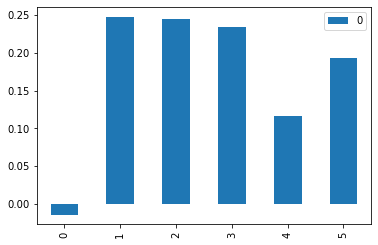

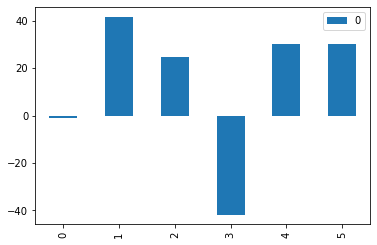

In [55]:
from sklearn.linear_model import SGDRegressor
n_iter=100
clf_ = SGDRegressor(max_iter=n_iter)
sgd=clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
lm=pd.DataFrame([-1.1865,41.6909,24.9138,-41.7214,30.3887,30.11893])
x=pd.DataFrame(sgd.coef_)

x.plot(kind='bar')
lm.plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
x = df.drop(columns = "Weight")
y = df["Weight"]

from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary(alpha=0.1)
# any one of Width,D_length,V_length,Species can be removed one by one then build model again 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     200.3
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.60e-69
Time:                        15:06:32   Log-Likelihood:                -985.89
No. Observations:                 159   AIC:                             1986.
Df Residuals:                     152   BIC:                             2007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const       -465.7652     35.204    -13.231      0.000    -524.025    -407.505
Species       -1.1865      0.747     -1.589      0.114      -2.423       0.049
V_length      41.6909     42.215      0.988      0.325     -28.172     111.554
D_length      24.9138     46.569      0.535      0.593     -52.155     101.982
C_length     -41.7214     19.199     -2.173      0.031     -73.495      -9.948
Height        30.3887      8.782      3.460      0.001      15.855      44.923
Width         30.1893     20.620      1.464      0.145      -3.935      64.314
==============================================================================
Omnibus:                       22.058   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.460
Skew:                           0.792   Prob(JB):                     2.43e-07
Kurtosis:                       4.445   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
x = df['D_length']
y = df["Weight"]

from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()
# there is impact 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     851.4
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           2.70e-65
Time:                        15:09:00   Log-Likelihood:                -1011.9
No. Observations:                 159   AIC:                             2028.
Df Residuals:                     157   BIC:                             2034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -470.8461     31.857    -14.780      0.000    -533.770    -407.922
D_length      30.6209      1.049     29.179      0.000      28.548      32.694
==============================================================================
Omnibus:                        7.767   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.661
Skew:                          -0.450   Prob(JB):                       0.0217
Kurtosis:                       3.589   Cond. No.                         86.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [65]:
from sklearn.model_selection import GridSearchCV
param= {'alpha':[0.00001, 0.001, 0.1, 10, 100]}
r= Ridge(normalize=True)
r_cv= GridSearchCV(r,param,cv=5,scoring='r2')
r_cv.fit(xtrain,ytrain)
r_cv.best_params_

{'alpha': 0.001}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [67]:
param= {'alpha':[0.00001, 0.001, 0.1, 0.1, 1],'l1_ratio':[0.4,0.5,0.6]}
e= ElasticNet(normalize=True)
e_cv=GridSearchCV(e,param,cv=5,scoring='r2')
e_cv.fit(xtrain,ytrain)
e_cv.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.6}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [69]:
from sklearn.linear_model import Lasso
param= {'alpha':[0.0001, 0.001, 0.1, 1, 2, 3]}
r= Lasso(normalize=True)
r_cv= GridSearchCV(r,param,cv=5,scoring='r2')
r_cv.fit(xtrain,ytrain)
r_cv.best_params_

{'alpha': 0.001}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
param= {'l1_ratio':[0.4,0.5,0.6]}
e= ElasticNet(normalize=True)
e_cv=GridSearchCV(e,param,cv=5,scoring='r2')
e_cv.fit(xtrain,ytrain)
e_cv.best_params_

{'l1_ratio': 0.4}

In [74]:
eas= ElasticNet(alpha=0.1,normalize=True,l1_ratio=0.4)
eas.fit(xtrain,ytrain)
y_pred_train= eas.predict(xtrain)
y_pred_test= eas.predict(xtest)
train_r2= r2_score(ytrain,y_pred_train)
test_r2= r2_score(ytest,y_pred_test)
train_mse = metrics.mean_squared_error(ytrain,y_pred_train)
test_mse = metrics.mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)
res_eas=[train_r2,test_r2,train_rmse,test_rmse]
res_eas

[0.3341117489732156,
 0.3578866105345574,
 0.8453713841494557,
 0.7299340026326756]